In [306]:
import pandas as pd

In [307]:
import numpy as np
import matplotlib.pyplot as plt

In [308]:
gene_ref_loc = '/home/ggorin/ref/refdata-gex-mm10-2020-A/kallisto-D/ref.t2g'
gene_ref = pd.read_csv(gene_ref_loc,header=None,sep='\t')
gene_ref = gene_ref.iloc[:,1:3]

gene_ref.columns = ['gene_id','gene_name']
gene_ref['gene_id'] = gene_ref['gene_id'].str[:-2]
gene_ref.set_index('gene_id',inplace=True)
gene_ref = gene_ref.drop_duplicates()

/home/ggorin/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [310]:
gene_ref

,gene_name
gene_id,
ENSMUSG00000051951,Xkr4
ENSMUSG00000089699,Gm1992
ENSMUSG00000102331,Gm19938
ENSMUSG00000102343,Gm37381
ENSMUSG00000025900.,Rp1
...,...
ENSMUSG00000079808,AC168977.1
ENSMUSG00000095041,AC149090.1
ENSMUSG00000063897,CAAA01118383.1


In [311]:
gene_ref[gene_ref['gene_name']=='Gnai3']

,gene_name
gene_id,
ENSMUSG00000000001,Gnai3


In [312]:
mesc_data = pd.read_csv('Fig1G_source_data.csv',header=0)

In [313]:
# mesc_data

In [314]:
mesc_data = mesc_data.iloc[:,2:]
mesc_data.drop_duplicates(subset=['ensembl_gene_id'],inplace=True)
mesc_data.set_index('ensembl_gene_id',inplace=True)

In [315]:
gene_ref.index.isin(mesc_data.index)

array([ True, False,  True, ..., False, False, False])

In [316]:
gene_ref=gene_ref[gene_ref.index.isin(mesc_data.index)]

In [317]:
mesc_data=mesc_data[mesc_data.index.isin(gene_ref.index)]

In [318]:
mesc_data.sort_index(inplace=True)
gene_ref.sort_index(inplace=True)

/home/ggorin/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:5582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


In [321]:
mesc_data

,log.burst.freq,log.burst.size,log.norm.int.noise
ensembl_gene_id,,,
ENSMUSG00000000001,-0.505909,1.573751,0.028216
ENSMUSG00000000056,-1.377528,1.189449,-0.074652
ENSMUSG00000000058,-3.122983,1.630836,0.842432
ENSMUSG00000000078,-0.469471,1.826132,0.338746
ENSMUSG00000000088,-0.455036,1.449607,0.068836
...,...,...,...
ENSMUSG00000117315,-1.392694,-1.505150,-0.214050
ENSMUSG00000117317,-1.765070,0.133329,-0.135730
ENSMUSG00000117322,-2.035946,0.384511,-0.094050


In [322]:
# gene_ref

In [323]:
# txdict

In [324]:
gene_ref

,gene_name
gene_id,
ENSMUSG00000000001,Gnai3
ENSMUSG00000000056,Narf
ENSMUSG00000000058,Cav2
ENSMUSG00000000078,Klf6
ENSMUSG00000000088,Cox5a
...,...
ENSMUSG00000117315,1600022D10Rik
ENSMUSG00000117317,Gm49961
ENSMUSG00000117322,6330415G19Rik


In [325]:
import sys
sys.path.insert(0, '/home/ggorin/projects/monod/src/')
import monod
from monod import preprocess

In [326]:
txdict = monod.preprocess.get_transcriptome('../../GP_2021_3/polyA_ref/gg_200524_mouse_genome_polyA_cum_1')

In [327]:
mesc_data = mesc_data.merge(gene_ref,left_index=True,right_index=True)

In [328]:
mesc_data

,log.burst.freq,log.burst.size,log.norm.int.noise,gene_name
ensembl_gene_id,,,,
ENSMUSG00000000001,-0.505909,1.573751,0.028216,Gnai3
ENSMUSG00000000056,-1.377528,1.189449,-0.074652,Narf
ENSMUSG00000000058,-3.122983,1.630836,0.842432,Cav2
ENSMUSG00000000078,-0.469471,1.826132,0.338746,Klf6
ENSMUSG00000000088,-0.455036,1.449607,0.068836,Cox5a
...,...,...,...,...
ENSMUSG00000117315,-1.392694,-1.505150,-0.214050,1600022D10Rik
ENSMUSG00000117317,-1.765070,0.133329,-0.135730,Gm49961
ENSMUSG00000117322,-2.035946,0.384511,-0.094050,6330415G19Rik


In [329]:
length = []
for gn in mesc_data['gene_name']:
    if gn in txdict.keys():
        length.append(txdict[gn])
    else:
        length.append(None)

In [330]:
mesc_data['lengths']=length

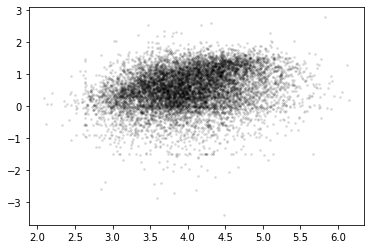

In [331]:
plt.scatter(np.log10(mesc_data['lengths']),mesc_data['log.burst.size'],3,'k',alpha=0.1)


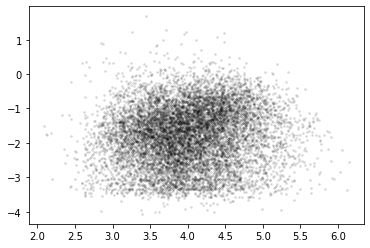

In [332]:
plt.scatter(np.log10(mesc_data['lengths']),mesc_data['log.burst.freq'],3,'k',alpha=0.1)


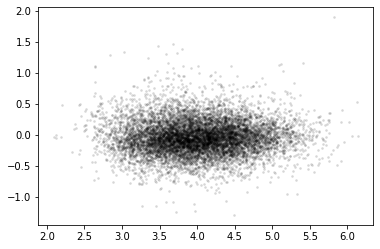

In [333]:
plt.scatter(np.log10(mesc_data['lengths']),mesc_data['log.norm.int.noise'],3,'k',alpha=0.1)


In [334]:
from monod import analysis

In [335]:
# sr = monod.analysis.load_search_results('./fits/gg_230313_025_desai_1/desai_dmso_cr/Bursty_Poisson_8x9/grid_scan_results_upd.res')

In [353]:

sr = monod.analysis.load_search_results('./fits/gg_230313_025_desai_2/desai_dmso/Bursty_Poisson_8x9/grid_scan_results.res')
sr.find_sampling_optimum()

(-7.142857142857143, -0.9375)

In [355]:
sd = monod.analysis.load_search_data('./fits/gg_230313_025_desai_2/desai_dmso/raw.sd')

In [356]:
bs = np.log10(sd.layers[1].var(1)/sd.layers[1].mean(1)-1)

/tmp/ipykernel_302771/2126356571.py:1: RuntimeWarning: invalid value encountered in log10
  bs = np.log10(sd.layers[1].var(1)/sd.layers[1].mean(1)-1)


In [357]:
rawmean = np.log10(sd.layers[1].mean(1))

In [358]:
rawmean.shape

(2000,)

In [359]:
phys_opt = sr.phys_optimum

In [360]:
phys_opt

array([[ 2.09557652, -0.70280237,  1.44047336],
       [ 1.95615256, -0.4152279 ,  0.00763607],
       [ 2.07379583, -0.60149183,  0.37744666],
       ...,
       [ 1.59183909, -0.62597327,  0.29541237],
       [ 2.03453338, -0.76995806,  0.53609173],
       [ 3.48892989, -0.39164427,  1.54346165]])

In [361]:
np.where(gene_names=='Cops5')[0][0]

0

In [362]:
monodb = []
monodg = []
basicb = []
rawmean_ = []
for gn in mesc_data['gene_name']:
    if gn in sr.gene_names:
        ind = np.where(sr.gene_names==gn)[0][0]
        monodb.append(phys_opt[ind,0])
        monodg.append(phys_opt[ind,2])
        basicb.append(bs[ind])
        rawmean_.append(rawmean[ind])
    else:
        monodb.append(None)
        monodg.append(None)
        basicb.append(None)
        rawmean_.append(None)

In [363]:
mesc_data['monod_burst_size']=monodb
mesc_data['monod_deg_rate']=monodg
mesc_data['basic_burst_size']=basicb
mesc_data['desai_spliced_mean']=rawmean_

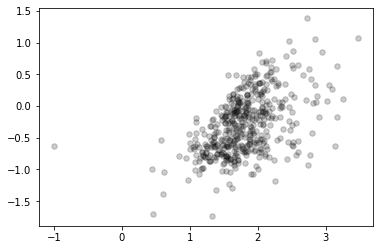

In [376]:
plt.scatter(monodb,basicb,30,'k',alpha=0.2) 

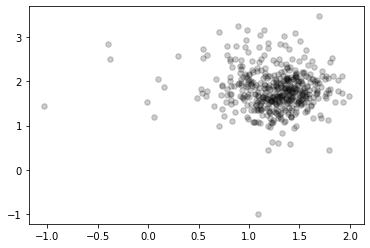

In [375]:
gf = mesc_data['monod_burst_size'].notna()
# plt.hist(mesc_data['log.burst.size'][gf],alpha=0.5)
# plt.hist(mesc_data['monod_burst_size'][gf],alpha=0.5)
plt.scatter(mesc_data['log.burst.size'][gf],mesc_data['monod_burst_size'][gf],30,'k',alpha=0.2) 
# plt.scatter(mesc_data['log.burst.freq'][gf],-mesc_data['monod_deg_rate'][gf]) 

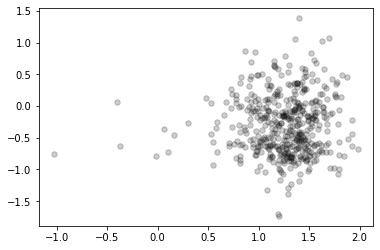

In [373]:
gf = mesc_data['basic_burst_size'].notna()
# plt.hist(mesc_data['log.burst.size'][gf],alpha=0.5)
# plt.hist(mesc_data['monod_burst_size'][gf],alpha=0.5)
plt.scatter(mesc_data['log.burst.size'][gf],mesc_data['basic_burst_size'][gf],30,'k',alpha=0.2) 
# plt.scatter(mesc_data['log.burst.freq'][gf],-mesc_data['monod_deg_rate'][gf]) 

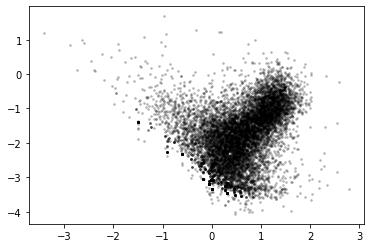

In [367]:
plt.scatter(mesc_data['log.burst.size'],mesc_data['log.burst.freq'],3,'k',alpha=0.2) 
# plt.scatter(mesc_data['log.burst.size']+mesc_data['log.burst.freq'],mesc_data['log.burst.size'],3,'k',alpha=0.2) 
# plt.scatter(mesc_data['log.burst.size'],mesc_data['log.burst.freq']) 


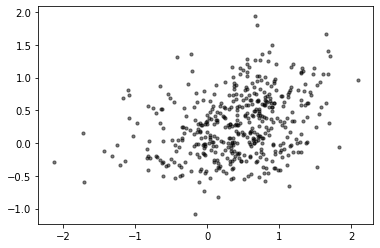

In [368]:
plt.scatter(mesc_data['log.burst.size']+mesc_data['log.burst.freq'],mesc_data['desai_spliced_mean'],10,'k',alpha=0.5) 


In [378]:
gf.sum()

453